In [5]:
%cd ..

/fs01/home/pwilson/projects/medAI/projects/prostnfound


/h/pwilson/.conda/envs/ai/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [12]:
dir = 'logs/prostnfound_plus_kfold'

In [13]:
"projects/prostnfound/logs/prostnfound_plus_kfold/fold1/metrics_by_core.csv"

'projects/prostnfound/logs/prostnfound_plus_kfold/fold1/metrics_by_core.csv'

In [22]:
import os
import pandas as pd


tables = []
for fold in range(5):
    try:  
        tables.append(
            pd.read_csv(os.path.join(
                dir, f'fold{fold}/metrics_by_core.csv'
            ))
        )
    except: 
        pass

In [57]:
from sklearn.metrics import recall_score

bias = 3.5
temp = 1

for table in tables:
    score = table['image_level_cancer_logits']

    import torch 
    score = ((torch.tensor(score.values).log() + bias) / temp).sigmoid().numpy() * 5

    pred = score >= 3
    label = (table['grade_group'] > 2).astype(int)
    print(recall_score(label, pred))



0.9264705882352942
0.8656716417910447
0.9518072289156626
0.6666666666666666
0.7448979591836735


In [42]:
import torch 
bias = 5
(torch.tensor(score.values).log() + bias).sigmoid()

tensor([0.6131, 0.7424, 0.6457,  ..., 0.9484, 0.9663, 0.9743],
       dtype=torch.float64)

In [37]:
table['image_level_cancer_logits'].max()

0.57733727

<Axes: >

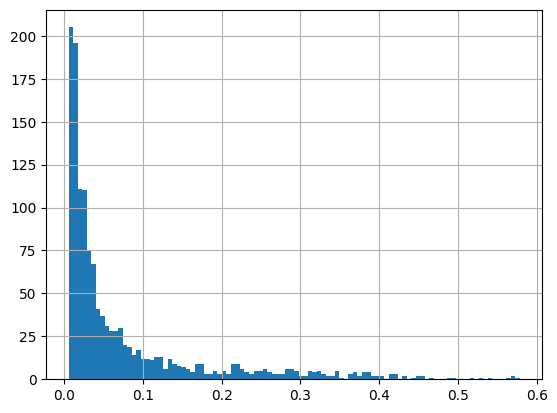

In [32]:
tables[0].image_level_cancer_logits.hist(bins=100)


<Axes: >

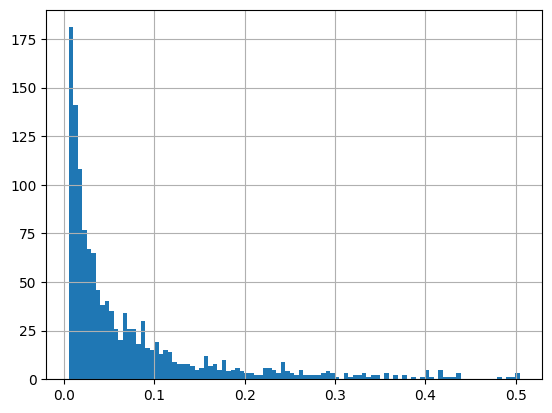

In [33]:
tables[1].image_level_cancer_logits.hist(bins=100)

<Axes: >

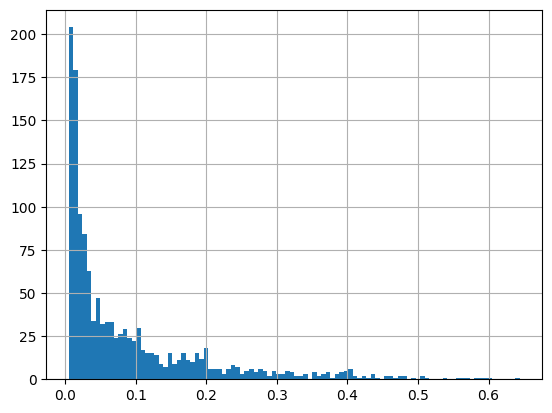

In [34]:
tables[2].image_level_cancer_logits.hist(bins=100)

<Axes: >

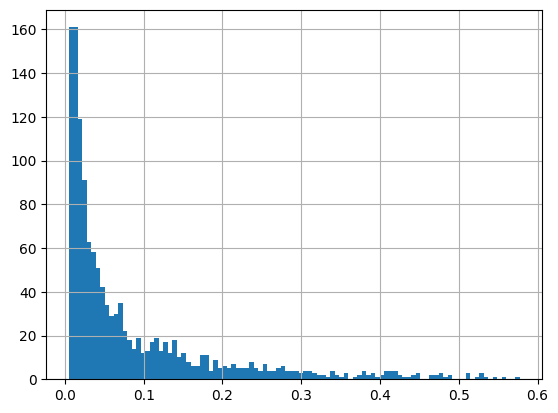

In [35]:
tables[4].image_level_cancer_logits.hist(bins=100)